In [6]:
import os
import sys
import cv2
import numpy as np
from ultralytics import YOLO
import torch
import torchvision.transforms as transforms
import shutil
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

In [1]:
!pip install ultralytics --upgrade
!pip install supervision
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gm9laVVmpThNSgEGjUZx")
project = rf.workspace("iksan-wijaya").project("plat-detection-3-experimental")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to plat-detection-3-(experimental)-3 in yolov8:: 100%|██████████| 7982/7982 [00:01<00:00, 5000.78it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
base_dir = "/content/plat-detection-3-(experimental)-3"

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

In [4]:
image_size = (640, 640)

In [7]:
# Load the YOLOv8 model
model = YOLO('yolov8n.pt')

# Train the model
model.train(data=os.path.join(base_dir, "data.yaml"), epochs=50, imgsz=640)

100%|██████████| 6.25M/6.25M [00:00<00:00, 317MB/s]


Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/plat-detection-3-(experimental)-3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 68.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 235MB/s]


AMP: checks passed ✅


train: Scanning /content/plat-detection-3-(experimental)-3/train/labels... 3339 images, 24 backgrounds, 0 corrupt: 100%|██████████| 3339/3339 [00:02<00:00, 1560.70it/s]

train: New cache created: /content/plat-detection-3-(experimental)-3/train/labels.cache


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1446, len(boxes) = 3705. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/plat-detection-3-(experimental)-3/valid/labels... 488 images, 1 backgrounds, 0 corrupt: 100%|██████████| 488/488 [00:00<00:00, 769.37it/s]

val: New cache created: /content/plat-detection-3-(experimental)-3/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 209, len(boxes) = 521. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50       2.2G      1.022      1.527      1.384         25        640: 100%|██████████| 209/209 [01:32<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.09it/s]

                   all        488        521      0.582      0.759      0.697      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.15G      1.014       1.03      1.357         38        640: 100%|██████████| 209/209 [01:20<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]


                   all        488        521       0.86        0.8      0.899       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.14G      1.018     0.8992      1.347         32        640: 100%|██████████| 209/209 [01:23<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.75it/s]

                   all        488        521      0.791      0.829      0.856      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.16G     0.9945      0.816      1.338         30        640: 100%|██████████| 209/209 [01:19<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]


                   all        488        521      0.952      0.916      0.966      0.642

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.16G     0.9223     0.7308      1.291         39        640: 100%|██████████| 209/209 [01:19<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.23it/s]

                   all        488        521      0.785        0.9      0.857      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.14G     0.9015     0.6967      1.274         28        640: 100%|██████████| 209/209 [01:19<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.94it/s]

                   all        488        521       0.96      0.919      0.965      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.14G     0.8962     0.6873      1.271         33        640: 100%|██████████| 209/209 [01:19<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.75it/s]

                   all        488        521      0.946       0.95      0.973        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.14G      0.868     0.6513      1.248         32        640: 100%|██████████| 209/209 [01:18<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.02it/s]

                   all        488        521      0.935      0.958       0.97      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.16G     0.8685     0.6389      1.243         29        640: 100%|██████████| 209/209 [01:17<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        488        521      0.906      0.928      0.953      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.16G      0.856     0.6189      1.237         26        640: 100%|██████████| 209/209 [01:18<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.16it/s]

                   all        488        521      0.935      0.946      0.968      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.15G     0.8109     0.5867      1.214         41        640: 100%|██████████| 209/209 [01:22<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.74it/s]

                   all        488        521      0.933      0.965      0.951      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.14G     0.7926      0.583      1.205         23        640: 100%|██████████| 209/209 [01:18<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.75it/s]

                   all        488        521      0.953      0.964      0.968      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.16G     0.7984     0.5791      1.212         24        640: 100%|██████████| 209/209 [01:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

                   all        488        521      0.956      0.963      0.977       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.14G     0.8025     0.5678      1.208         25        640: 100%|██████████| 209/209 [01:22<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:08<00:00,  1.96it/s]

                   all        488        521      0.964       0.96      0.977      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.14G     0.8012     0.5655      1.193         33        640: 100%|██████████| 209/209 [01:18<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]

                   all        488        521      0.942      0.967      0.975      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.14G     0.7862     0.5534      1.196         28        640: 100%|██████████| 209/209 [01:19<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]

                   all        488        521      0.968      0.971       0.98      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.16G     0.7552     0.5325      1.174         35        640: 100%|██████████| 209/209 [01:18<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.08it/s]

                   all        488        521      0.931      0.954      0.958      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.14G     0.7708     0.5313      1.177         27        640: 100%|██████████| 209/209 [01:22<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

                   all        488        521      0.975      0.959      0.979      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.14G     0.7656     0.5233       1.18         28        640: 100%|██████████| 209/209 [01:21<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.03it/s]

                   all        488        521      0.967      0.967      0.982      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.16G     0.7531      0.511      1.164         25        640: 100%|██████████| 209/209 [01:21<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.45it/s]

                   all        488        521      0.977      0.971      0.982      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.16G     0.7449     0.5019      1.164         25        640: 100%|██████████| 209/209 [01:17<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.68it/s]

                   all        488        521       0.96      0.967      0.979      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.14G     0.7365     0.4952      1.152         27        640: 100%|██████████| 209/209 [01:25<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.51it/s]

                   all        488        521      0.973       0.97      0.981      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.14G     0.7371     0.4915      1.148         28        640: 100%|██████████| 209/209 [01:20<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.64it/s]

                   all        488        521      0.973      0.964      0.982      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.14G     0.7138     0.4846      1.152         32        640: 100%|██████████| 209/209 [01:18<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.62it/s]

                   all        488        521      0.967      0.961      0.981      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.16G     0.7308     0.4842       1.15         29        640: 100%|██████████| 209/209 [01:18<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.40it/s]

                   all        488        521      0.977      0.972      0.982      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.14G     0.7201     0.4722      1.145         30        640: 100%|██████████| 209/209 [01:21<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.57it/s]

                   all        488        521      0.976      0.973      0.983      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.14G     0.7239     0.4732      1.149         30        640: 100%|██████████| 209/209 [01:19<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.89it/s]

                   all        488        521      0.971      0.976      0.983      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.18G     0.7163     0.4713      1.144         24        640: 100%|██████████| 209/209 [01:19<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.13it/s]

                   all        488        521      0.971      0.973      0.983      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.16G     0.7065     0.4659      1.139         29        640: 100%|██████████| 209/209 [01:21<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.27it/s]

                   all        488        521      0.978      0.975      0.986      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.14G     0.6976     0.4557      1.129         26        640: 100%|██████████| 209/209 [01:18<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.16it/s]

                   all        488        521      0.963      0.977      0.985      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.14G      0.688     0.4468       1.13         32        640: 100%|██████████| 209/209 [01:19<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.61it/s]

                   all        488        521      0.979      0.972      0.984       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.14G     0.6992     0.4517      1.132         33        640: 100%|██████████| 209/209 [01:20<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]

                   all        488        521      0.974      0.975      0.984      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.16G      0.674     0.4412      1.125         27        640: 100%|██████████| 209/209 [01:21<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.25it/s]

                   all        488        521      0.967      0.979      0.982      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.14G     0.6759     0.4372      1.119         26        640: 100%|██████████| 209/209 [01:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.52it/s]

                   all        488        521      0.973      0.968      0.984      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.14G     0.6753     0.4243      1.117         25        640: 100%|██████████| 209/209 [01:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.45it/s]

                   all        488        521      0.975      0.976      0.984      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.14G     0.6614     0.4264      1.117         24        640: 100%|██████████| 209/209 [01:20<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.62it/s]

                   all        488        521      0.975      0.973      0.984      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.16G     0.6586     0.4234      1.106         26        640: 100%|██████████| 209/209 [01:24<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.15it/s]


                   all        488        521      0.975      0.973      0.983       0.79

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.14G     0.6553     0.4196        1.1         27        640: 100%|██████████| 209/209 [01:18<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.03it/s]

                   all        488        521      0.972      0.977      0.984      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.14G     0.6516     0.4132        1.1         27        640: 100%|██████████| 209/209 [01:19<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.80it/s]

                   all        488        521      0.983      0.975      0.984      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.14G      0.656     0.4134      1.104         26        640: 100%|██████████| 209/209 [01:19<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.54it/s]

                   all        488        521       0.97      0.977      0.985      0.788


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.16G     0.6668     0.3644      1.123         11        640: 100%|██████████| 209/209 [01:22<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.73it/s]

                   all        488        521      0.975      0.972      0.984        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.14G     0.6584     0.3451      1.115         13        640: 100%|██████████| 209/209 [01:14<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.12it/s]

                   all        488        521      0.976      0.971      0.985      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.14G      0.649     0.3387      1.103         11        640: 100%|██████████| 209/209 [01:14<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:07<00:00,  2.20it/s]

                   all        488        521       0.98      0.964      0.985      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.14G     0.6439     0.3308      1.098         12        640: 100%|██████████| 209/209 [01:15<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.38it/s]

                   all        488        521       0.98      0.975      0.985      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.16G     0.6243     0.3256      1.087         11        640: 100%|██████████| 209/209 [01:16<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:06<00:00,  2.63it/s]

                   all        488        521       0.98      0.971      0.988      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.14G     0.6227       0.32      1.084         11        640: 100%|██████████| 209/209 [01:15<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.39it/s]

                   all        488        521      0.977      0.977      0.988      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.14G     0.6204     0.3166      1.082         11        640: 100%|██████████| 209/209 [01:16<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]


                   all        488        521      0.973      0.977      0.986      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.14G     0.6163     0.3157      1.084         10        640: 100%|██████████| 209/209 [01:17<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.74it/s]

                   all        488        521      0.972      0.979      0.987      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.16G     0.6075     0.3096      1.078          9        640: 100%|██████████| 209/209 [01:20<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.72it/s]

                   all        488        521      0.973      0.977      0.987      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.14G     0.5944     0.3061      1.069         12        640: 100%|██████████| 209/209 [01:16<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.42it/s]

                   all        488        521      0.975      0.977      0.986      0.815



50 epochs completed in 1.204 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.19 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:09<00:00,  1.70it/s]


                   all        488        521      0.973      0.977      0.987      0.816
Speed: 0.4ms preprocess, 2.7ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
lr/pg1,▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▆▅▇▅███▇████▇██████████████████████████
metrics/mAP50-95(B),▁▄▃▅▄▆▆▆▆▆▇▇▇▇▆▇▇▇▇▇▇▇▇▇▇█▇▇████████████
metrics/precision(B),▁▆▅▇▅▇▇▇▇▇██▇█▇█████████████████████████
metrics/recall(B),▁▂▃▆▅▇▇▆▇█▇▇██▇█████████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,████▆▆▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd3a54dba30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [9]:
model_best = YOLO('/content/runs/detect/train/weights/best.pt')

In [10]:
# Set up directories
base_dir = "/content/plat-detection-3-(experimental)-3"
test_dir = os.path.join(base_dir, "test")
images_dir = os.path.join(test_dir, "images")
labels_dir = os.path.join(test_dir, "labels")

# Load the YOLOv8 model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to your trained model

# Initialize lists to store true and predicted labels
y_true = []
y_pred = []

# Define class for 'plat'
plat_class_id = 0  # Assuming class 0 corresponds to 'plat'

# Process each image in the test set
for img_name in os.listdir(images_dir):
    if img_name.endswith(('.jpg', '.png', '.jpeg')):  # Filter for image files
        img_path = os.path.join(images_dir, img_name)

        # Load image
        image = cv2.imread(img_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

        # Run inference
        results = model.predict(image_rgb)

        # Get predictions
        predictions = results[0]  # Get the first prediction result

        # Extract predicted class indices
        pred_classes = predictions.boxes.cls.cpu().numpy().astype(int) if predictions.boxes else []

        # Determine if a 'plat' was detected in the predictions
        detected_plat = any(pred_class == plat_class_id for pred_class in pred_classes)

        # Load the true labels from the labels directory
        label_path = os.path.join(labels_dir, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Determine if 'plat' is present in the true labels
        if os.path.exists(label_path):
            true_labels = np.loadtxt(label_path, dtype=int, usecols=(0))  # Assuming class labels are in the first column

            # Ensure true_labels is a list
            if true_labels.ndim == 0:  # Single value case
                true_labels = [true_labels.item()]  # Convert to list
            else:
                true_labels = true_labels.tolist()  # Convert to list

            # Check if 'plat' is present in true labels
            true_plat_present = any(true_label == plat_class_id for true_label in true_labels)
        else:
            true_plat_present = False  # No label file means no plat in the image

        # Append the ground truth and prediction as binary values
        y_true.append(1 if true_plat_present else 0)  # 1 if 'plat' is in true labels, 0 otherwise
        y_pred.append(1 if detected_plat else 0)  # 1 if 'plat' was detected, 0 otherwise


0: 640x640 1 plat, 11.1ms
Speed: 3.4ms preprocess, 11.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 7.8ms
Speed: 3.4ms preprocess, 7.8ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 9.7ms
Speed: 2.6ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 plats, 8.0ms
Speed: 2.7ms preprocess, 8.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 8.5ms
Speed: 4.5ms preprocess, 8.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 7.8ms
Speed: 3.2ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 8.0ms
Speed: 3.7ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 7.6ms
Speed: 3.5ms preprocess, 7.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 plat, 8

In [11]:
%matplotlib inline

Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-Score: 1.00


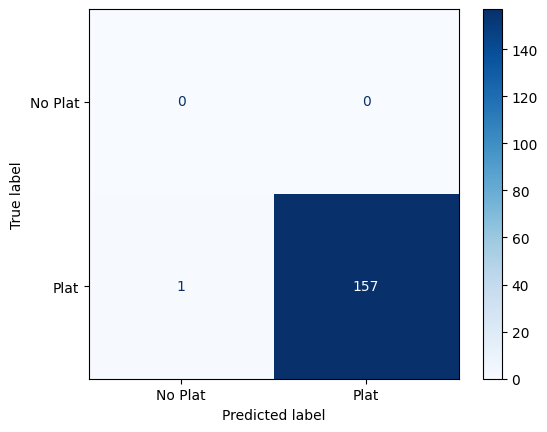

In [12]:
# Calculate confusion matrix if both lists are populated
if y_true and y_pred:
    # Calculate metrics (Accuracy, Precision, Recall, F1-Score)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Display the results
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # Display the confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Plat', 'Plat'])
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
else:
    print("No predictions or true labels to calculate metrics.")